#### FORECASTING ELANTRA SALES

An important application of linear regression is understanding sales. Consider a company that produces and sells a product. In a given period, if the company produces more units than how many consumers will buy, the company will not earn money on the unsold units and will incur additional costs due to having to store those units in inventory before they can be sold. If it produces fewer units than how many consumers will buy, the company will earn less than it potentially could have earned. Being able to predict consumer sales, therefore, is of first order importance to the company.

In this problem, we will try to predict monthly sales of the Hyundai Elantra in the United States. The Hyundai Motor Company is a major automobile manufacturer based in South Korea. The Elantra is a car model that has been produced by Hyundai since 1990 and is sold all over the world, including the United States. We will build a linear regression model to predict monthly sales using economic indicators of the United States as well as Google search queries.

The file elantra.csv contains data for the problem. Each observation is a month, from January 2010 to February 2014.

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn import datasets, linear_model, metrics

#import itertools
#import pandas_datareader.data as pdweb
#from pandas_datareader.data import DataReader
#from datetime import datetime
#from io import StringIO

In [5]:
rawdf = pd.read_csv('../data/elantra.csv')
print(rawdf.info())
elantraTrain = rawdf[rawdf['Year'] < 2013]
elantraTest = rawdf[rawdf['Year'] >= 2013]
print()
print('Training set has {} rows'.format(len(elantraTrain)))
print('Test set has {} rows'.format(len(elantraTest)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
Month           50 non-null int64
Year            50 non-null int64
ElantraSales    50 non-null int64
Unemployment    50 non-null float64
Queries         50 non-null int64
CPI_energy      50 non-null float64
CPI_all         50 non-null float64
dtypes: float64(3), int64(4)
memory usage: 2.8 KB
None

Training set has 36 rows
Test set has 14 rows


In [6]:
LinReg = smf.ols(formula='ElantraSales ~ Unemployment + CPI_all + CPI_energy + Queries',data=elantraTrain).fit()
LinReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ElantraSales   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     5.803
Date:                Mon, 25 Jul 2016   Prob (F-statistic):            0.00132
Time:                        16:50:44   Log-Likelihood:                -339.99
No. Observations:                  36   AIC:                             690.0
Df Residuals:                      31   BIC:                             697.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     9.539e+04   1.71e+05      0.559      0.580     -2.53e+05  4.43e+05
Unemployment -3179.8996   3610.262     -0.881      0.385     -1.05e+04  4183.279
CPI_all       -297.6456    704.837     -0.422      0.676     -1735.169  1139.878
CPI_energy      38.5060    109.601      0.351      0.728      -185.027   262.039
Queries         19.0297     11.259      1.690      0.101        -3.933    41.992
==============================================================================
Omnibus:                        1.210   Durbin-Watson:                   1.190
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                0.947
Skew:                           0.390   Prob(JB):                        0.623
Kurtosis:                       2.845   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looks like none of the independent variables is significant...

Our model R-Squared is relatively low, so we would now like to improve our model. In modeling demand and sales, it is often useful to model seasonality. Seasonality refers to the fact that demand is often cyclical/periodic in time. For example, in countries with different seasons, demand for warm outerwear (like jackets and coats) is higher in fall/autumn and winter (due to the colder weather) than in spring and summer. (In contrast, demand for swimsuits and sunscreen is higher in the summer than in the other seasons.) Another example is the "back to school" period in North America: demand for stationary (pencils, notebooks and so on) in late July and all of August is higher than the rest of the year due to the start of the school year in September.

In our problem, since our data includes the month of the year in which the units were sold, it is feasible for us to incorporate monthly seasonality. From a modeling point of view, it may be reasonable that the month plays an effect in how many Elantra units are sold.

To incorporate the seasonal effect due to the month, build a new linear regression model that predicts monthly Elantra sales using Month as well as Unemployment, CPI_all, CPI_energy and Queries. Do not modify the training and testing data frames before building the model.

In [7]:
LinReg = smf.ols(formula='ElantraSales ~ Unemployment + CPI_all + CPI_energy + Queries + Month',data=elantraTrain).fit()
LinReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ElantraSales   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     4.609
Date:                Mon, 25 Jul 2016   Prob (F-statistic):            0.00308
Time:                        16:53:23   Log-Likelihood:                -339.79
No. Observations:                  36   AIC:                             691.6
Df Residuals:                      30   BIC:                             701.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     1.483e+05   1.95e+05      0.759      0.454     -2.51e+05  5.47e+05
Unemployment -4137.2826   4008.558     -1.032      0.310     -1.23e+04  4049.285
CPI_all       -517.9910    808.259     -0.641      0.526     -2168.676  1132.694
CPI_energy      54.1833    114.076      0.475      0.638      -178.790   287.157
Queries         21.1855     11.978      1.769      0.087        -3.278    45.649
Month          110.6853    191.657      0.578      0.568      -280.731   502.102
==============================================================================
Omnibus:                        1.544   Durbin-Watson:                   1.158
Prob(Omnibus):                  0.462   Jarque-Bera (JB):                1.312
Skew:                           0.453   Prob(JB):                        0.519
Kurtosis:                       2.764   Cond. No.                     1.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model is not better because the adjusted R-squared has gone down and none of the variables (including the new one) are very significant.

You may be experiencing an uneasy feeling that there is something not quite right in how we have modeled the effect of the calendar month on the monthly sales of Elantras. If so, you are right. In particular, we added Month as a variable, but Month is an ordinary numeric variable. In fact, we must convert Month to a factor variable before adding it to the model.

By modeling Month as a factor variable, the effect of each calendar month is not restricted to be linear in the numerical coding of the month.

In [14]:
elantraTrain['Month'] = elantraTrain['Month'].astype('category')
elantraTrain['Month']

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0      1
1      1
2      1
5      2
6      2
7      2
10     3
11     3
12     3
14     4
15     4
16     4
18     5
19     5
20     5
22     6
23     6
24     6
26     7
27     7
28     7
30     8
31     8
32     8
34     9
35     9
36     9
38    10
39    10
40    10
42    11
43    11
44    11
46    12
47    12
48    12
Name: Month, dtype: category
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

In [15]:
LinReg = smf.ols(formula='ElantraSales ~ Unemployment + CPI_all + CPI_energy + Queries + Month',data=elantraTrain).fit()
LinReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ElantraSales   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     6.044
Date:                Mon, 25 Jul 2016   Prob (F-statistic):           0.000147
Time:                        17:04:04   Log-Likelihood:                -319.26
No. Observations:                  36   AIC:                             670.5
Df Residuals:                      20   BIC:                             695.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     3.125e+05   1.44e+05      2.169      0.042       1.2e+04  6.13e+05
Month[T.2]    2254.9978   1943.249      1.160      0.260     -1798.548  6308.543
Month[T.3]    6696.5568   1991.635      3.362      0.003      2542.080  1.09e+04
Month[T.4]    7556.6074   2038.022      3.708      0.001      3305.368  1.18e+04
Month[T.5]    7420.2490   1950.139      3.805      0.001      3352.331  1.15e+04
Month[T.6]    9215.8326   1995.230      4.619      0.000      5053.856  1.34e+04
Month[T.7]    9929.4644   2238.800      4.435      0.000      5259.409  1.46e+04
Month[T.8]    7939.4474   2064.629      3.845      0.001      3632.706  1.22e+04
Month[T.9]    5013.2866   2010.745      2.493      0.022       818.946  9207.627
Month[T.10]   2500.1838   2084.057      1.200      0.244     -1847.083  6847.451
Month[T.11]   3238.9315   2397.231      1.351      0.192     -1761.605  8239.468
Month[T.12]   5293.9107   2228.310      2.376      0.028       645.738  9942.083
Unemployment -7739.3814   2968.747     -2.607      0.017     -1.39e+04 -1546.683
CPI_all      -1343.3068    592.919     -2.266      0.035     -2580.114  -106.500
CPI_energy     288.6314     97.974      2.946      0.008        84.262   493.001
Queries         -4.7636     12.938     -0.368      0.717       -31.752    22.224
==============================================================================
Omnibus:                        0.047   Durbin-Watson:                   2.795
Prob(Omnibus):                  0.977   Jarque-Bera (JB):                0.246
Skew:                          -0.032   Prob(JB):                        0.884
Kurtosis:                       2.600   Cond. No.                     1.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Another peculiar observation about the regression is that the sign of the Queries variable has changed. In particular, when we naively modeled Month as a numeric variable, Queries had a positive coefficient. Now, Queries has a negative coefficient. Furthermore, CPI_energy has a positive coefficient -- as the overall price of energy increases, we expect Elantra sales to increase, which seems counter-intuitive (if the price of energy increases, we'd expect consumers to have less funds to purchase automobiles, leading to lower Elantra sales).

As we have seen before, changes in coefficient signs and signs that are counter to our intuition may be due to a multicolinearity problem. To check, compute the correlations of the variables in the training set.

Which of the following variables is CPI_energy highly correlated with? Indicate all that apply. (Include only variables where the absolute value of the correlation exceeds 0.6. For the purpose of this question, treat Month as a numeric variable, not a factor variable.)

C:\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


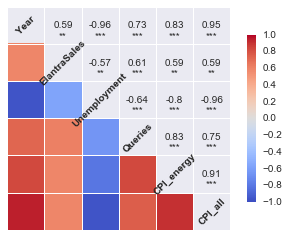

In [16]:
sns.corrplot(elantraTrain)

Let us now simplify our model (the model using the factor version of the Month variable). We will do this by iteratively removing variables, one at a time. Remove the variable with the highest p-value (i.e., the least statistically significant variable) from the model. Repeat this until there are no variables that are insignificant or variables for which all of the factor levels are insignificant. Use a threshold of 0.10 to determine whether a variable is significant.

Which variables, and in what order, are removed by this process?

In [17]:
# Step 0:  We see above that Queries is not significant
# Step 1:  Remove Queries and refit.  Now everything is significant!  We stop!

LinReg = smf.ols(formula='ElantraSales ~ Unemployment + CPI_all + CPI_energy + Month',data=elantraTrain).fit()
LinReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ElantraSales   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     6.744
Date:                Mon, 25 Jul 2016   Prob (F-statistic):           5.73e-05
Time:                        17:11:49   Log-Likelihood:                -319.38
No. Observations:                  36   AIC:                             668.8
Df Residuals:                      21   BIC:                             692.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     3.257e+05   1.37e+05      2.384      0.027      4.16e+04   6.1e+05
Month[T.2]    2410.9137   1857.103      1.298      0.208     -1451.144  6272.972
Month[T.3]    6880.0868   1888.145      3.644      0.002      2953.474  1.08e+04
Month[T.4]    7697.3580   1960.214      3.927      0.001      3620.869  1.18e+04
Month[T.5]    7444.6447   1908.477      3.901      0.001      3475.749  1.14e+04
Month[T.6]    9223.1343   1953.636      4.721      0.000      5160.325  1.33e+04
Month[T.7]    9602.7221   2012.661      4.771      0.000      5417.165  1.38e+04
Month[T.8]    7919.4990   2020.993      3.919      0.001      3716.614  1.21e+04
Month[T.9]    5074.2910   1962.230      2.586      0.017       993.611  9154.971
Month[T.10]   2724.2422   1951.778      1.396      0.177     -1334.702  6783.186
Month[T.11]   3665.0765   2055.659      1.783      0.089      -609.900  7940.053
Month[T.12]   5643.1903   1974.363      2.858      0.009      1537.278  9749.103
Unemployment -7971.3395   2840.795     -2.806      0.011     -1.39e+04 -2063.584
CPI_all      -1377.5816    573.387     -2.403      0.026     -2570.005  -185.158
CPI_energy     268.0299     78.752      3.403      0.003       104.257   431.803
==============================================================================
Omnibus:                        0.000   Durbin-Watson:                   2.771
Prob(Omnibus):                  1.000   Jarque-Bera (JB):                0.137
Skew:                          -0.001   Prob(JB):                        0.934
Kurtosis:                       2.698   Cond. No.                     1.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
Pred = LinReg.predict(elantraTest)

In [20]:
# What is the sum of squared errors of this model on the test set?

SSE = sum((Pred-elantraTest['ElantraSales'])**2)
SSE

190757747.44432235

In [21]:
# What would the baseline method predict for all observations in the test set? Remember the
# baseline method we use predicts the average outcome of all raws in the training set.

In [22]:
elantraTrain['ElantraSales'].mean()

14462.25

In [23]:
# What is the test set R-squared?

# A: You can compute the SST as the sum of the squared differences between ElantraSales
# in the testing set and the mean of ElantraSales in the training set:

print('SSE is {}'.format(SSE))
SST = sum((elantraTest['ElantraSales'] - elantraTrain['ElantraSales'].mean())**2)
print('SST is {}'.format(SST))
# Then, using the SSE computed previously, the R-squared is 1 minus  SSE/SST.

1 - SSE/SST

SSE is 190757747.44432235
SST is 701375142.375


0.7280232276291152

In [31]:
# What is the largest absolute error that we make in our test set predictions?

(np.abs(Pred-elantraTest['ElantraSales'])).max()

7491.4876927111764

In [32]:
# In which period (Month,Year) do we make the largest absolute error in our prediction?

elantraTest[np.abs(Pred-elantraTest['ElantraSales']) == (np.abs(Pred-elantraTest['ElantraSales'])).max()][['Month','Year']]

,Month,Year
13,3,2013
